In [20]:
using StaticArrays
using Parameters
using RobotDynamics
using LinearAlgebra
using PyPlot

import RobotDynamics: dynamics
import RobotDynamics: state_dim, control_dim

In [3]:
@with_kw struct SphericalPendulum{T} <: AbstractModel
    m::T = 0.3
    L::T = 0.2
    g::T = 9.81
    mc::T = 2.0
    b::T = 0.3
end

SphericalPendulum

In [4]:
function dynamics(p::SphericalPendulum, x, u)
    @unpack m, L, g ,mc, b= p
    cx = x[1]
    cy = x[2]
    ϕ = x[3]
    θ = x[4]
    
    cẋ = x[5]
    cẏ = x[6]
    ϕ̇ = x[7]
    θ̇ = x[8]
    
    fx = u[1]
    fy = u[2]
    
    cẍ = ((L*fx*m*cos(ϕ) + L*fx*mc*cos(ϕ) - 
        b*m*θ̇*cos(θ) - b*mc*θ̇*cos(θ) - 
        L*fx*m*cos(ϕ)^3 + b*m*θ̇*cos(ϕ)^2*cos(θ) + 
        b*m*ϕ̇*cos(ϕ)*sin(ϕ)*sin(θ) + 
        b*mc*ϕ̇*cos(ϕ)*sin(ϕ)*sin(θ) + 
        L*fy*m*cos(ϕ)^2*sin(ϕ)*sin(θ) - 
        L^2*m*mc*ϕ̇^2*cos(ϕ)^2*sin(θ) - 
        L^2*m*mc*θ̇^2*cos(ϕ)^4*sin(θ) - 
        L*g*m*mc*cos(ϕ)^3*cos(θ)*sin(θ))/
        (L*mc*cos(ϕ)*(m + mc - m*cos(ϕ)^2*cos(θ)^2)))
    
    cÿ = ((L*fy*mc + b*m*ϕ̇*cos(ϕ) + b*mc*ϕ̇*cos(ϕ) + 
        L*fy*m*cos(ϕ)^2 + L^2*m*mc*ϕ̇^2*sin(ϕ) - 
        b*m*ϕ̇*cos(ϕ)*cos(θ)^2 - L*fy*m*cos(ϕ)^2*cos(θ)^2 + 
        L*fx*m*cos(ϕ)*sin(ϕ)*sin(θ) - 
        b*m*θ̇*cos(θ)*sin(ϕ)*sin(θ) + L^2*m*mc*θ̇^2*cos(ϕ)^2*sin(ϕ) + 
        L*g*m*mc*cos(ϕ)*cos(θ)*sin(ϕ))/
        (L*mc*(m + mc - m*cos(ϕ)^2*cos(θ)^2)))

    
    ϕ̈ = (-(L*fy*m^2*cos(ϕ)^2 + b*m^2*ϕ̇*cos(ϕ) + 
        b*mc^2*ϕ̇*cos(ϕ) - b*m^2*ϕ̇*cos(ϕ)*cos(θ)^2 + 
        L*fy*m*mc*cos(ϕ)^2 - L*fy*m^2*cos(ϕ)^2*cos(θ)^2 + 
        2*b*m*mc*ϕ̇*cos(ϕ) - b*m*mc*ϕ̇*cos(ϕ)*cos(θ)^2 + 
        L^2*m*mc^2*θ̇^2*cos(ϕ)^2*sin(ϕ) + L^2*m^2*mc*θ̇^2*cos(ϕ)^2*sin(ϕ) + 
        L*fx*m^2*cos(ϕ)*sin(ϕ)*sin(θ) - b*m^2*θ̇*cos(θ)*sin(ϕ)*sin(θ) + 
        L^2*m^2*mc*ϕ̇^2*cos(ϕ)^2*cos(θ)^2*sin(ϕ) + L*fx*m*mc*cos(ϕ)*sin(ϕ)*sin(θ) - 
        b*m*mc*θ̇*cos(θ)*sin(ϕ)*sin(θ) + L*g*m*mc^2*cos(ϕ)*cos(θ)*sin(ϕ) + 
        L*g*m^2*mc*cos(ϕ)*cos(θ)*sin(ϕ))/(L^2*m*mc*cos(ϕ)*(m + mc - m*cos(ϕ)^2*cos(θ)^2)))
    
    θ̈ = (-(b*mc^2*θ̇ + b*m*mc*θ̇ + b*m^2*θ̇*cos(θ)^2 + 
        b*m*mc*θ̇*cos(θ)^2 - b*m^2*θ̇*cos(ϕ)^2*cos(θ)^2 -
        L*fx*m^2*cos(ϕ)*cos(θ) + L*fx*m^2*cos(ϕ)^3*cos(θ) +
        L*g*m*mc^2*cos(ϕ)*sin(θ) + L*g*m^2*mc*cos(ϕ)*sin(θ) -
        L^2*m*mc^2*ϕ̇*θ̇*sin(2*ϕ) - L^2*m^2*mc*ϕ̇*θ̇*sin(2*ϕ) - 
        b*m*mc*θ̇*cos(ϕ)^2*cos(θ)^2 - L*fx*m*mc*cos(ϕ)*cos(θ) +
        L^2*m^2*mc*ϕ̇^2*cos(ϕ)^2*cos(θ)*sin(θ) +
        L^2*m^2*mc*θ̇^2*cos(ϕ)^4*cos(θ)*sin(θ) -
        b*m^2*ϕ̇*cos(ϕ)*cos(θ)*sin(ϕ)*sin(θ) - 
        L*fy*m^2*cos(ϕ)^2*cos(θ)*sin(ϕ)*sin(θ) +
        2*L^2*m^2*mc*ϕ̇*θ̇*cos(ϕ)^3*cos(θ)^2*sin(ϕ) -
        b*m*mc*ϕ̇*cos(ϕ)*cos(θ)*sin(ϕ)*sin(θ))/
        (L^2*m*mc*cos(ϕ)^2*(m + mc - m*cos(ϕ)^2*cos(θ)^2)))

    @SVector [cẋ, cẏ, ϕ̇, θ̇, cẍ, cÿ, ϕ̈, θ̈]
end

dynamics (generic function with 9 methods)

In [5]:
state_dim(::SphericalPendulum) = 8
control_dim(::SphericalPendulum) = 2

control_dim (generic function with 4 methods)

In [6]:
using Colors
using CoordinateTransformations
using Rotations
using GeometryBasics
using MeshCat

In [67]:
vis = Visualizer()
render(vis)

┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8702
└ @ MeshCat /Users/boom/.julia/packages/MeshCat/GlCMx/src/visualizer.jl:73


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String,Array{UInt8,1}}(), nothing, Dict{String,MeshCat.SceneTrees.SceneNode}()), Set{Any}(), ip"127.0.0.1", 8702))

In [95]:
p = SphericalPendulum(L = 0.5, b = 0.0001)

kinematics(x) = (x[1] - p.L*cos(x[3])*sin(x[4]),x[2] + p.L*sin(x[3]), -p.L*cos(x[3])*cos(x[4]))

function visualize!(vis, model::SphericalPendulum, X, Δt)
    setobject!(vis[:ball], Sphere(Point3f0(0), 0.1),  
        MeshPhongMaterial(color = RGBA(0, 1, 0, 1.0)))
    
    dim = Vec(0.1, 0.3, 0.1)
    cart = Rect3D(-dim/2, dim)
    setobject!(vis[:cart],  cart,  
        MeshPhongMaterial(color = colorant"red"))

    pole = Cylinder(Point3f0(0,0,0),Point3f0(0,0,model.L),0.01f0)
    setobject!(vis[:pole], pole, MeshPhongMaterial(color=colorant"blue"))
    
    anim = MeshCat.Animation(convert(Int, floor(1.0 / Δt)))
    for (i, x) in enumerate(X)
        MeshCat.atframe(anim, i) do
            trans = Translation(x[1], x[2],  0)
            rot = LinearMap(RotY(x[4])) ∘ LinearMap(RotX(π + x[3]))
            settransform!(vis[:ball], Translation(kinematics(x)...))
            settransform!(vis[:pole], trans ∘ rot)
            settransform!(vis[:cart], trans)
        end
    end
    MeshCat.setanimation!(vis, anim)
end

visualize! (generic function with 1 method)

In [14]:
function dynamics_rk4(a::SphericalPendulum,x,u,h)
    f1 = dynamics(a, x, u)
    f2 = dynamics(a, x + 0.5*h*f1, u)
    f3 = dynamics(a, x + 0.5*h*f2, u)
    f4 = dynamics(a, x + h*f3, u)
    result = x + (h/6.0)*(f1 + 2*f2 + 2*f3 + f4)
    return result
end

dynamics_rk4 (generic function with 1 method)

In [73]:
tf = 10.0
Δt = 0.01
time = range(0, tf, step=Δt)
N = Int(round(tf/Δt)) + 1

init_pos = @SVector zeros(8)
X = [@SVector zeros(8) for k = 1:N] 

direction = 1
for k = 1:length(time) - 1
#     try
    if k==100
        direction = -direction
    elseif (k-100)%200 == 0
        direction = -direction
    end
        X[k+1] = dynamics_rk4(p,X[k],direction*[2.0, 1.0],Δt)
#     catch DomainError
#         @show (X)
#     end
end

visualize!(vis, p, X, Δt)

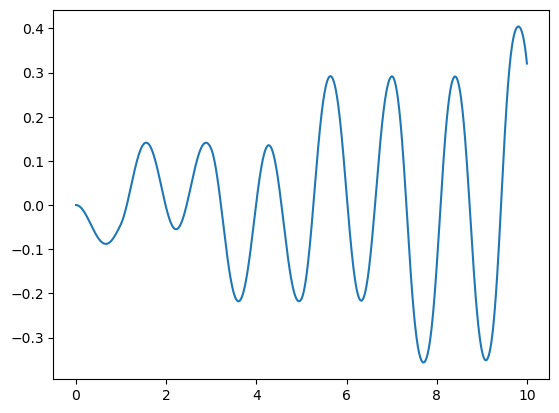

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd81dd3d0a0>

In [74]:
thist = Array(range(0,Δt*(N-1), step=Δt))
plot(thist, [x[3] for x in X])


In [27]:
using TrajectoryOptimization
using Altro

┌ Info: Precompiling Altro [5dcf52e5-e2fb-48e0-b826-96f46d2e3e73]
└ @ Base loading.jl:1278


In [87]:
tf = 10.0
Δt = 0.01
time = range(0, tf, step=Δt)
N = Int(round(tf/Δt)) + 1

n,m = size(p)
Q = 1.0e-2*Diagonal(@SVector ones(n))
Qf = 100.0*Diagonal(@SVector ones(n))
R = 1.0e-1*Diagonal(@SVector ones(m))
x0 = zeros(n)
xf = SA[-1.0,0,0,0,0,0,0,0]
obj = LQRObjective(Q,R,Qf,xf,N)

# costs = map(1:N) do i
#     if i == 300
#         LQRCost(Q, R, [3.0,2.0,])
#     elseif i == 600
        
#     else
        
#     end
# end


Objective

In [91]:
u0 = @SVector zeros(m)
U0 = [u0 for k = 1:N-1]

conSet = ConstraintList(n,m,N)
x_bnd = [Inf,Inf,0.06,0.06,Inf,Inf,Inf,Inf]
bnd = BoundConstraint(n, m, x_min=-x_bnd, x_max=x_bnd)
goal = GoalConstraint(xf)
waypoint = GoalConstraint([3,2,0,0,0,0,0,0], [1,2])
add_constraint!(conSet, bnd, 1:N-1)
add_constraint!(conSet, waypoint, 500)
add_constraint!(conSet, goal, N)

prob = Problem(p, obj, xf, tf, x0=x0, constraints=conSet)
initial_controls!(prob, U0)
opts = SolverOptions(
    cost_tolerance_intermediate=1e-2,
    penalty_scaling=10.,
    penalty_initial=1.0
)
altro = ALTROSolver(prob, opts)
solve!(altro);


SOLVE COMPLETED
 solved using the ALTRO Solver,
 part of the Altro.jl package developed by the REx Lab at Stanford and Carnegie Mellon Universities

  Solve Statistics
    Total Iterations: 21
    Solve Time: 1980.3882279999998 (ms)

  Covergence
    Terminal Cost: 2.0582408176220373
    Terminal dJ: -0.01860071783944539
    Terminal gradient: 0.0006977268164063731
    Terminal constraint violation: 0.00022621528991799422
    Solve Status: SOLVE_SUCCEEDED


In [78]:
render(vis)

MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String,Array{UInt8,1}}(), UInt8[0x83, 0xa7, 0x6f, 0x70, 0x74, 0x69, 0x6f, 0x6e, 0x73, 0x82  …  0x5f, 0x61, 0x6e, 0x69, 0x6d, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict{String,MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String,Array{UInt8,1}}(), nothing, Dict{String,MeshCat.SceneTrees.SceneNode}("pole" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x73, 0x68, 0x63, 0x61, 0x74, 0x2f, 0x70, 0x6f, 0x6c, 0x65], nothing, Dict{String,Array{UInt8,1}}(), nothing, Dict{String,MeshCat.SceneTrees.SceneNode}()),"ball" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x73, 0x68, 0x63, 0x61, 0x74, 0x2f, 0x62, 0x61, 0x6c, 0x6c], nothing, Dict{String,Array{UInt8,1}}(), nothing, Dict{String,MeshCat.SceneTrees.SceneNode}()),"cart" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x73, 0x68, 0x63, 0x61, 0x74, 0x2f, 0x63, 0x61, 0x72, 0x74], nothing, Dict{String,Array{UInt8,1}}(), nothing, Dict{String,MeshCat.SceneTrees.SceneNode}()))))), Set(Any[WebSocket(server, CONNECTED)]), ip"127.0.0.1", 8702))

In [96]:
X = states(altro)
visualize!(vis, p, X, Δt)

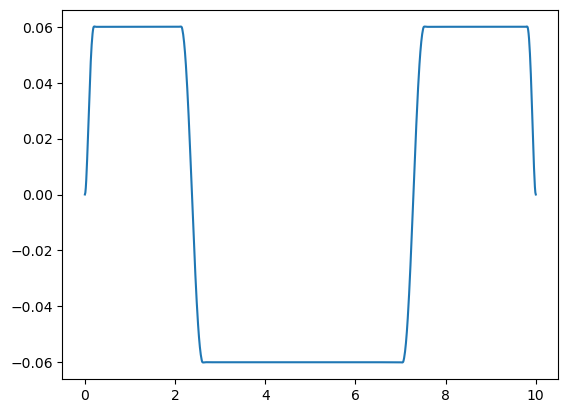

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd803c2aa90>

In [93]:
thist = Array(range(0,Δt*(N-1), step=Δt))
plot(thist, [x[4] for x in X])